# Analysing Video Games from 1980 to 2017 - Data Analyst Portfolio Project

This project explores video games that were produced from 1980 to 2017. The dataset is provided by a user from Kaggle(https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings). We'll use Python to analyze the dataset and use the pandas and SciPy libraries to answer the following questions:

1. What genre of game is most popular?
2. Which publishing company is the most popular/successful?
3. What are the highest global sales for each year?
4. For each publisher, in which region do they have the most sales? 
5. What platform was the dominant in each year?

In [37]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

vd_data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [38]:
vd_data.head()
# vd_data.info()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains 16,720 rows and 16 columns containing information about the species. It looks like all columns except  'Name', 'Platform', 'Year of Release', 'Genre', 'Publisher', 'NA Sales', 'EU Sales', 'JP Sales', 'Other Sales', and 'Global Sales' columns have some missing values.

Here's a quick summary of the columns:

- **Name**: Name of the game
- **Platform**: Console on which the game is running
- **Year of Release**: Year of the game released
- **Genre**: Game's category
- **Publisher**: Company that published the game
- **NA Sales**: Game sales in North America (in millions of units)
- **EU Sales**: Game sales in European Union (in millions of units)
- **JP Sales**: Game sales in Japan (in millions of units)
- **Other Sales**: Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australia, Europe excluding the E.U. and South America (in millions of units)
- **Critic Score**: Aggregate score compiled by Metacritic staff
- **Critic Count**: The number of critics used in coming up with the Critic_score
- **User Score**: Score by Metacritic's subscribers
- **User Count**: Number of users who gave the user_score
- **Developer**: Party responsible for creating the game
- **Rating**: The ESRB ratings (E.g. Everyone, Teen, Adults Only..etc)

In [39]:
vd_data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


## Data Question #1: What genre of game is most popular?

In [40]:
# Genre count
popular_genre = vd_data.Genre.value_counts().rename_axis('Genre').reset_index(name='Count')
popular_genre

,Genre,Count
0,Action,3370
1,Sports,2348
2,Misc,1750
3,Role-Playing,1500
4,Shooter,1323
5,Adventure,1303
6,Racing,1249
7,Platform,888
8,Simulation,874
9,Fighting,849


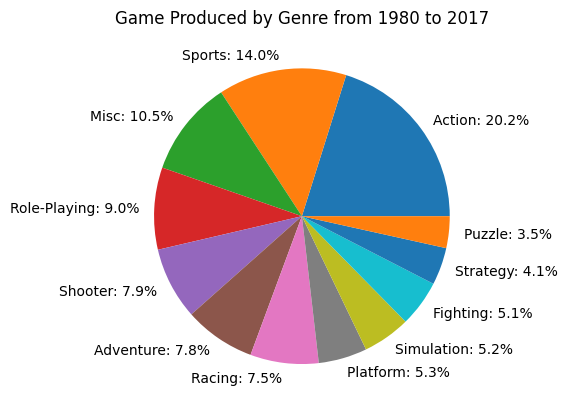

In [41]:
genre_total_count = 0
genre_percent = []

for i in range(0,len(popular_genre['Count'])):
    genre_total_count += popular_genre['Count'][i]
    
for i in range(0, len(popular_genre['Count'])):
    genre_percent.append(popular_genre['Genre'][i] + ': '+ str(round(popular_genre['Count'][i]/genre_total_count *100,1)) + '%')

plt.pie(x = popular_genre['Count'], labels = genre_percent)
plt.title('Game Produced by Genre from 1980 to 2017')
# plt.legend(title = 'Genres', loc="center right", bbox_to_anchor=(1.5, 0, 0.5, 1))
plt.show()

It seems that the 'Action' genre is the most popular genre accounting for 20.2% of games, followed by 'Sports' and 'Misc' genres with 14% and 10.5% respectively. 

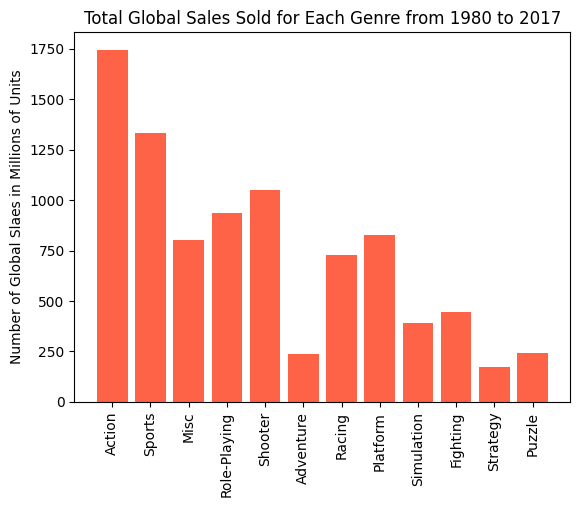

In [42]:
genre_sales = 0
genre_sales_list = []
genre_list = []

# for i in range(0, len(popular_genre['Genre'])):
#     genre_list.append(popular_genre['Genre'][i])

for genre in popular_genre['Genre']:
    for i in range(0, len(vd_data.Genre)):
        if vd_data.Genre[i] == genre:
            genre_sales += vd_data.Global_Sales[i]
    genre_sales_list.append(round(genre_sales, 2))
    genre_sales = 0

plt.bar(x = popular_genre['Genre'], height = genre_sales_list, color = 'tomato')
plt.xticks(rotation = 'vertical')
plt.title('Total Global Sales Sold for Each Genre from 1980 to 2017')
plt.ylabel('Number of Global Slaes in Millions of Units')
plt.show()

According to the figure above, the 'Action' genre also has the highest number of global sales followed by the 'Sports' genre which is to be expected. However, the 'Shooter' genre has the third highest number of global sales which is suprising, considering that the genre only accounts for 7.9% of games produced. 

In [43]:
# Publisher Count
popular_publisher = vd_data.Publisher.value_counts().rename_axis('Publisher').reset_index(name='Count')
popular_publisher

,Publisher,Count
0,Electronic Arts,1356
1,Activision,985
2,Namco Bandai Games,939
3,Ubisoft,933
4,Konami Digital Entertainment,834
...,...,...
576,Valve,1
577,ITT Family Games,1
578,Elite,1
579,Evolution Games,1


They are 580 publishing companies but we will only be focusing on the top 10 companies. There are several companies that have only published 1 game which would be irrelevant. 

## Data Question #2: Which publishing company is the most popular/successful?

16665


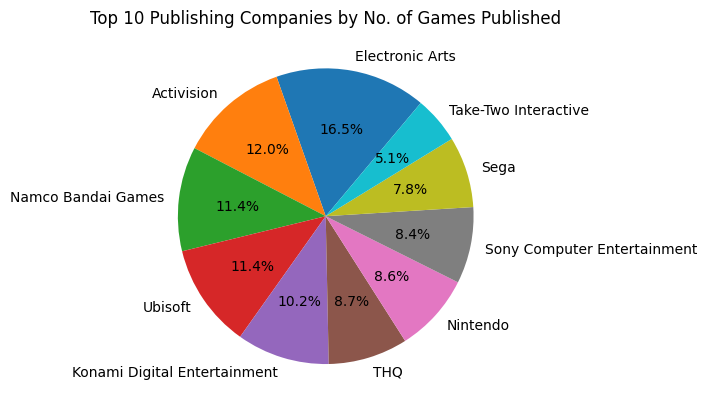

In [44]:
publisher_count = []
publisher_label = []
publisher_percent = []

for i in range(0,10):
    publisher_count.append(popular_publisher['Count'][i])
    publisher_label.append(popular_publisher['Publisher'][i])

print(total_count)
plt.pie(x = publisher_count, labels = publisher_label, startangle= 50,  autopct='%1.1f%%')
plt.title('Top 10 Publishing Companies by No. of Games Published')
# plt.legend(title="Companies",loc="right",bbox_to_anchor=(2, 0, 0.5, 1))
plt.show()

Electronic Arts (EA) has the highest number of games produced with a number of 1356 of a total of 8215 games (8.1% of all games). Activision has the second highest number of games published accounting for 5.9% followed by Namco Bandai Games and Ubisoft with 55.6%. 

In [45]:
# Finding top games from each publishing company 
top_game_count = 0
top_game_list = []
top_game = ''

for publisher in publisher_label:
    for i in range(0, len(vd_data.Name)):
        if vd_data.Publisher[i] == publisher and vd_data.Global_Sales[i] > top_game_count:
            top_game_count = vd_data.Global_Sales[i]
            top_game = vd_data.Name[i]
    top_game_list.append(top_game)
    top_game_count = 0
    top_game = ''

print(top_game_list)

['FIFA 16', 'Call of Duty: Modern Warfare 3', 'Namco Museum', 'Just Dance 3', 'Metal Gear Solid 2: Sons of Liberty', 'WWF SmackDown!', 'Wii Sports', 'Gran Turismo 3: A-Spec', 'Mario & Sonic at the Olympic Games', 'Grand Theft Auto V']


['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', 'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive'] [1116.96, 731.16, 254.62, 471.61, 282.39, 338.44, 1788.81, 606.48, 270.35, 403.82]


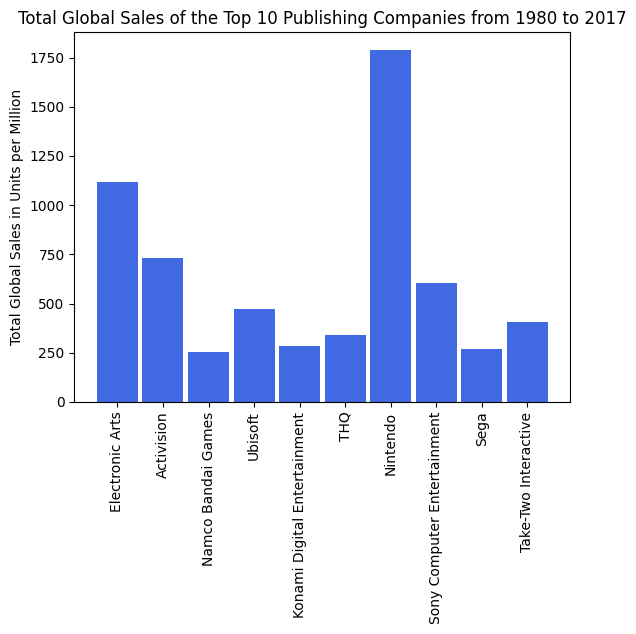

In [46]:
publisher_sales = []
sales_count = 0

for publisher in publisher_label:
    for n in range(0, len(vd_data.Global_Sales)):
        if vd_data.Publisher[n] == publisher:
            sales_count += vd_data.Global_Sales[n]
    publisher_sales.append(round(sales_count, 2))
    sales_count = 0

print(publisher_label, publisher_sales)
    
plt.bar(x = publisher_label, height = publisher_sales, align = 'center', width = 0.9, color ='royalblue')
plt.title('Total Global Sales of the Top 10 Publishing Companies from 1980 to 2017')
plt.ylabel('Total Global Sales in Units per Million')
plt.xticks(rotation = 'vertical')
plt.show()

Nintendo has the highest global sales of approximately 1750 million units followed by Electronic Arts. Even though, Electronic Arts has published the most games, they only have a total global sale of approximately 1100 million which is significantly less compared to Nintendo. Activision has the next highest total global sales with approximately 750 million. 

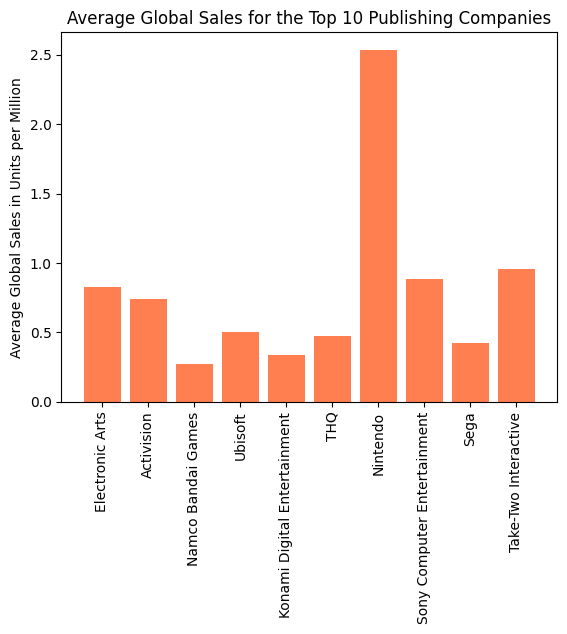

In [47]:
avg_sale = []
avg_sale_count = 0

for i in range(0, 10):
    avg_sale.append(publisher_sales[i]/publisher_count[i])
    
plt.bar(x = publisher_label, height = avg_sale, color = 'coral', width = 0.8)
plt.title('Average Global Sales for the Top 10 Publishing Companies')
plt.ylabel('Average Global Sales in Units per Million')
plt.xticks(rotation = 'vertical')
plt.show()

Once again, Nintendo has the highest average global sales with approximately 2.5 million units sold per game. This is very significant compared to the remaining 9 publishing companies. Surprisingly, Take-Two Interartive comes in second with approximately 0.9 million units sold per game despite producing less games compared to the remaining 8 publishing companies. Their top selling game was 'Grand Theft Auto V' which performed extremely well. Sony Computer Entertainment has the third highest average global sales with approximately 0.8 million units. 

# Data Question #3: What are the highest global sales for each year?

In [ ]:
top_sales_each_year = []
top_sale_count = 0
year_list = []
game = ''
game_of_the_year = []
year = 1980

while year <= 2017:
    year_list.append(year)
    for i in range(0, len(vd_data.Year_of_Release)):
        if vd_data.Year_of_Release[i] == year and vd_data.Global_Sales[i] > top_sale_count:
            top_sale_count = vd_data.Global_Sales[i]
            game = vd_data.Name[i]
    top_sales_each_year.append(top_sale_count)
    game_of_the_year.append(game)
    top_sale_count = 0
    game = ''
    year += 1

    
# print(top_sales_each_year)
# print(game_of_the_year)

In [ ]:
plt.plot(year_list,top_sales_each_year, color = 'limegreen')
plt.title('Highest Global Sales Per Year from 1980 to 2017')
plt.xlabel('Year')
plt.ylabel('Number of Sales in Millions of Units')
plt.annotate('Wii\nSports', ha = 'center', fontsize = 10, xy = (2006, 82), xytext = (2000, 78), color ='royalblue', arrowprops  = dict(arrowstyle = '-|>', color = 'royalblue'))
plt.xscale('linear')
plt.show()

The graph peaks in the year 2006 with a value of approximately 80 million units sold which is made by the game 'Wii Sports'. There are also peaks in the years 1985 and 2008. The most popular game of these years was 'Super Mario Bros.' and 'Mario Kart Wii' respectively. 

# Data Question #4: For each publisher, in which region do they have the most sales? 

In [ ]:
NA_sales = 0
EU_sales = 0
JP_sales = 0
Other_sales = 0
x_label = ['NA', 'EU', 'JP', 'Other']

fig = plt.figure(facecolor = 'aliceblue', figsize = (10, 7))
fig.suptitle("Companies' Unit Sales in Different Regions from 1980 to 2017", fontsize = 14)

for i in range(0, 9):
    for n in range(0, len(vd_data.Publisher)):
        if vd_data.Publisher[n] == publisher_label[i]:
                NA_sales += vd_data.NA_Sales[n]
                EU_sales += vd_data.EU_Sales[n]
                JP_sales += vd_data.JP_Sales[n]
                Other_sales += vd_data.Other_Sales[n]
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.5)
    plt.title(publisher_label[i], fontsize = 12)
    plt.bar(x = x_label, height = [NA_sales, EU_sales, JP_sales, Other_sales], color = 'blue', 'cornflowerblue', 'darkblue', 
                                                                                       'navy')
    plt.xticks(fontsize = 10)
    plt.ylim(0, 850)
    NA_sales = 0
    EU_sales = 0
    JP_sales = 0
    Other_sales = 0
    
plt.show()

The figures above show the companies' regional sales from 1980 to 2017. Interestingly, all of the companies top regional sales come from the North American region, exclusing Konami Digital Entertainment and Namco Bandai Games. Considering that Nintendo has the highest global sales, it is not suprising that its regional sales are the highest among the others, followed by Electronic Arts. 

# Data Question #5: What platform was the dominant in each year?

In [ ]:
# Platform Count
platform = vd_data.Platform.value_counts().rename_axis('Platform').reset_index(name='Count')
platform

We will only focus on the top 10 platforms considering that thereis a considerable difference between the 9th and 10th console. 

In [ ]:
platform_list = []
platform_count_list =[]
platform_percent = []
platform_total_count = 0

for i in range(0,10):
    platform_list.append(platform['Platform'][i])
    platform_count_list.append(platform['Count'][i])

for count in platform_count_list:
    platform_total_count += count

for i in range(0,len(platform_count_list)):
    platform_percent.append(platform_list[i] + ': '+ str(round(platform_count_list[i]/platform_total_count*100,1)) + '%')

plt.pie(x = platform_count_list, labels = platform_percent)
plt.title('Top 10 Platforms Based on No. of Games Running On It')
plt.legend(title="Platforms",loc="right",bbox_to_anchor=(1.2, 0, 0.5, 1))
plt.show()

The console 'PS2' has the highest number of games running on, accounting for 16.3% of games followed by 'DS' as a close second with 16.2%. Next, platforms 'PS3' and 'Wii' accounts for approximately 10% of games running on. 

In [ ]:
plt.bar(x = platform_list, height = platform_count_list, color = 'gold')
plt.title('Top 10 Platforms Based on Total Global Sales from 1980 to 2017')
plt.ylabel('Total Global Sales in Units per Million')
plt.show()

Based on the figure above, the 'PS2' also known as the 'Playstation 2' has the highest total global sales with approximately 2300 million units. Followed by the 'DS', there is only a small difference in global sales. The third highest total global sales is the 'PS3' with approximately 1300 million units which is significantly less than the 'PS2' and 'DS'

# Conclusion

The purpose of this analysis is to explore and gain some insight into the video game industry. We have identified the most popular game genre which is the 'Action' genre and the most popular console which is the 'Playstation 2'. We have also found a trend in regional sales which indicates that the 'North American' region is the most demanding region compared to the other regions such as Japan and Europe. Lastly, from our analysis, we have gathered that the most successful publishing company is Nintendo. They have the highest number of sales by a large margin and they have the highest average global sales for each game they produce. 